In [7]:
import pandas as pd
import os
import numpy as np

In [8]:
data = pd.read_csv('./comparaison.csv')
lines = []
meanTimeCounting = 0
meanTimeQuick = 0
meanTimeQuickSeuil = 0
meanTimeQuickRdmSeuil = 0
for i in range(9):
    meanTimeCounting += data.iloc[[i], [2]]
    print(meanTimeCounting)
    

    timeCounting
0             10
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN
    timeCounting
0            NaN


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 6 columns):
filename              153 non-null object
 numbers              153 non-null int64
 timeCounting         153 non-null int64
 timeQuick            153 non-null float64
 timeQuickSeuil       153 non-null float64
 timeQuickRdmSeuil    153 non-null float64
dtypes: float64(3), int64(2), object(1)
memory usage: 7.2+ KB


SEUILS

In [10]:
data = pd.read_csv('./seuils.csv', skipinitialspace=True)

data.head()

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,1000,0,0.587980,0.622396
1,./exemplaires/testset_1000_0.txt,1000,2,0.505106,0.527129
2,./exemplaires/testset_1000_0.txt,1000,4,0.446684,0.477274
3,./exemplaires/testset_1000_0.txt,1000,6,0.412410,0.519423
4,./exemplaires/testset_1000_0.txt,1000,8,0.418431,0.476758


In [11]:
# time seuil=0
defaultTimesVar = data["seuil"] == 0
defaultTimes = data[defaultTimesVar]
defaultTimes = defaultTimes.loc[:, ["filename", "timeQuickSeuil", "timeQuickRdmSeuil"]]
defaultTimes

,filename,timeQuickSeuil,timeQuickRdmSeuil
0,./exemplaires/testset_1000_0.txt,0.587980,0.622396
15,./exemplaires/testset_1000_1.txt,0.473873,0.404369
30,./exemplaires/testset_1000_2.txt,0.406017,0.390675
45,./exemplaires/testset_1000_3.txt,0.417389,0.426112
60,./exemplaires/testset_1000_4.txt,0.395526,0.394586
75,./exemplaires/testset_1000_5.txt,0.449143,0.400214
90,./exemplaires/testset_1000_6.txt,0.401356,0.404824
105,./exemplaires/testset_1000_7.txt,0.432752,0.438387
120,./exemplaires/testset_1000_8.txt,0.449080,0.402515
135,./exemplaires/testset_1000_9.txt,0.415603,0.458314


In [12]:
#getting a default time
#print (defaultTimes.loc[defaultTimes["filename"] == "./exemplaires/testset_1000_1.txt","timeQuickSeuil"])
def getDefaultTime(filename):
    return defaultTimes.loc[defaultTimes["filename"] == filename,"timeQuickSeuil"].values[0]

def getDefaultTimeRdm(filename):
    return defaultTimes.loc[defaultTimes["filename"] == filename,"timeQuickRdmSeuil"].values[0]

time = getDefaultTime("./exemplaires/testset_1000_0.txt")
print(time)
time = getDefaultTimeRdm("./exemplaires/testset_1000_0.txt")
print(time)

0.5879800000000001
0.622396


In [13]:
#Have the ratio (gain) column added
def addRatio(x):
    time = getDefaultTime(x["filename"])
    ratio = time/x["timeQuickSeuil"]
    return ratio
def addRatioRdm(x):
    time = getDefaultTimeRdm(x["filename"])
    ratio = time/x["timeQuickRdmSeuil"]
    return ratio
    
data["gain"] = data.apply(addRatio, axis=1)
#data["gain"] = defaultTimes.loc[((data["seuil"] == 0) and (data["filename"])) == data["filename"],"timeQuickSeuil"]/data["timeQuickSeuil"]
data["gainRdm"] = data.apply(addRatioRdm, axis=1)
data

,filename,numbers,seuil,timeQuickSeuil,timeQuickRdmSeuil,gain,gainRdm
0,./exemplaires/testset_1000_0.txt,1000,0,0.587980,0.622396,1.000000,1.000000
1,./exemplaires/testset_1000_0.txt,1000,2,0.505106,0.527129,1.164072,1.180728
2,./exemplaires/testset_1000_0.txt,1000,4,0.446684,0.477274,1.316322,1.304064
3,./exemplaires/testset_1000_0.txt,1000,6,0.412410,0.519423,1.425717,1.198245
4,./exemplaires/testset_1000_0.txt,1000,8,0.418431,0.476758,1.405202,1.305476
5,./exemplaires/testset_1000_0.txt,1000,10,0.441487,0.462502,1.331817,1.345715
6,./exemplaires/testset_1000_0.txt,1000,12,0.426691,0.451705,1.378000,1.377882
7,./exemplaires/testset_1000_0.txt,1000,14,0.445735,0.455377,1.319125,1.366771
8,./exemplaires/testset_1000_0.txt,1000,16,0.462971,0.450516,1.270015,1.381518
9,./exemplaires/testset_1000_0.txt,1000,18,0.477217,0.444444,1.232102,1.400392


In [14]:
means = data.groupby('seuil').mean()
means = means.loc[:,["gain", "gainRdm"]]
means

,gain,gainRdm
seuil,,
0,1.000000,1.000000
2,1.169956,1.015446
4,1.222666,1.039297
6,1.222169,1.040195
8,1.165382,1.048795
10,1.190769,1.047116
12,1.146868,1.048475
14,1.133007,1.051093
16,1.122417,1.052883


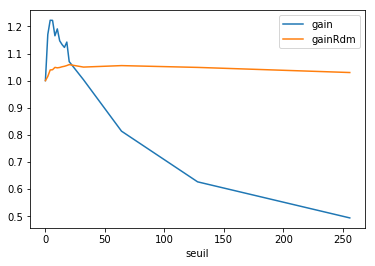

In [20]:
means.plot()

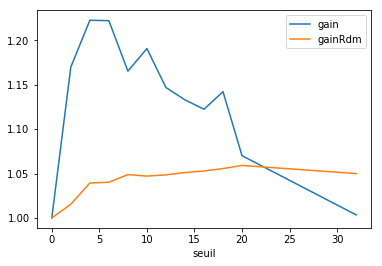

In [16]:
means[:12].plot()

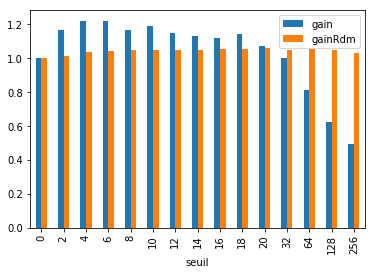

In [22]:
means.plot(kind='bar')

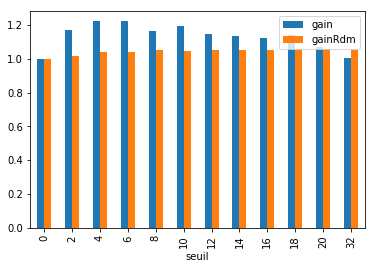

In [21]:
means[:12].plot(kind='bar')